# Read initial model and plot velocity in horizontal section

In [1]:
from pytomoatt.model import ATTModel
import numpy as np
# initial model hdf5 file
initial_model_file = '2_models/model_init_N7_201_201.h5'
# input parameters file
par_file = '3_input_params/input_params_inv.yaml'

# read model file by pytomoatt
model = ATTModel.read(initial_model_file, par_file)
initial_model = model.to_xarray()

# we can access the velocity at arbitrary depth
depth = 0.0
tmp = initial_model.interp_dep(depth, field='vel')
print("The shape of initial model array is ", tmp.shape)
lon = tmp[:,0]
lat = tmp[:,1]
vel = tmp[:,2]

The shape of initial model array is  (40401, 3)


# Pygmt plot

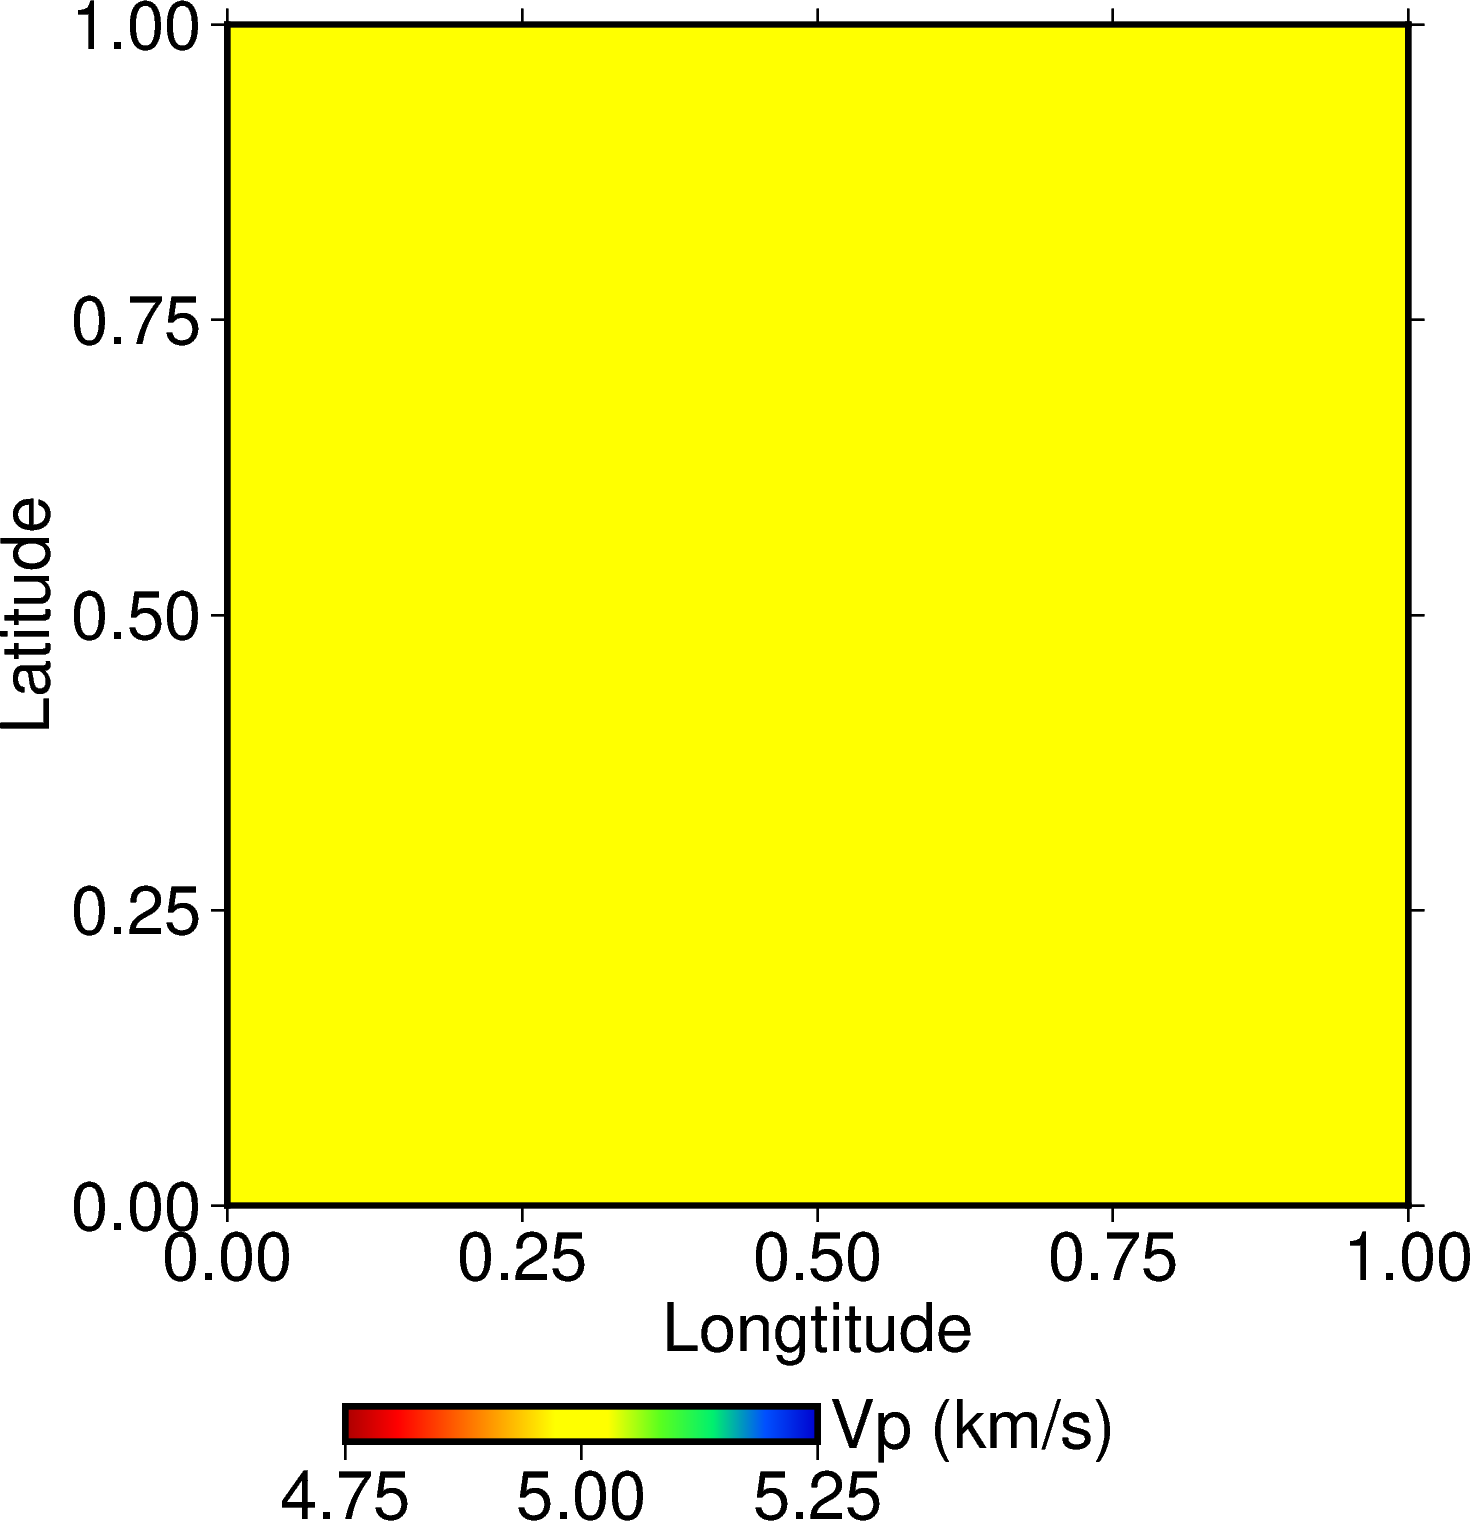

In [2]:
import sys
sys.path.append('../utils')
from functions_for_plot import plot_map

fname = 'img/1a_initial_model.png'
fig = plot_map(lon,lat,vel,0.01,0.01,
            fname = fname, 
            x_label = "Longtitude",
            y_label = "Latitude",
            colorbar = "Vp (km/s)", 
            cpt_range = [4.75,5.25])